# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
print(f'ТИПЫ ДАННЫХ:\n{df.dtypes})\n')
print(f'NA:\n{df.isna().sum(axis=0)}\n')
print(f'NaN:\n{df.isnull().sum(axis=0)}\n')
print(f'ПУСТЫЕ:\n{(df == "").sum(axis=0)}')

ТИПЫ ДАННЫХ:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object)

NA:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

NaN:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

ПУСТЫЕ:
work_year             0
experience_level      0
employment_type       0
job_tit

In [ ]:
i = 0

for line in df.values.T:
  print(f'{df.columns[i]}: {len(np.unique(line))}')
  i += 1

work_year: 4
experience_level: 4
employment_type: 4
job_title: 93
salary: 815
salary_currency: 20
salary_in_usd: 1035
employee_residence: 78
remote_ratio: 3
company_location: 72
company_size: 3


## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

X_train, X_pretest, y_train, y_pretest = train_test_split(X, y, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X_pretest, y_pretest, test_size=0.5)

## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

categorical_features = X_train.columns[list(X_train.dtypes == 'object')]
numerical_features = X_train.columns[list(X_train.dtypes != 'object')]

enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

enc.fit(X_train[categorical_features])

X_train_ohe = pd.DataFrame(enc.transform(X_train[categorical_features]),
                           columns=enc.get_feature_names_out(), dtype=int)

X_train_ready = pd.concat([X_train_ohe, X_train[numerical_features].reset_index()], axis=1).set_index('index')

X_test_ohe = pd.DataFrame(enc.transform(X_test[categorical_features]),
                           columns=enc.get_feature_names_out(), dtype=int)

X_test_ready = pd.concat([X_test_ohe, X_test[numerical_features].reset_index()], axis=1).set_index('index')

X_val_ohe = pd.DataFrame(enc.transform(X_val[categorical_features]),
                           columns=enc.get_feature_names_out(), dtype=int)

X_val_ready = pd.concat([X_val_ohe, X_val[numerical_features].reset_index()], axis=1).set_index('index')


linreg = LinearRegression()

linreg.fit(X_train_ready, y_train)

y_pred = linreg.predict(X_test_ready)

print('\nБез регуляризации:')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


linreg = Lasso()

linreg.fit(X_train_ready, y_train)
y_pred = linreg.predict(X_test_ready)

print('\nС регуляризацией:')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Без регуляризации:
MAPE: 389669798.9271713
RMSE: 48499697495124.49

С регуляризацией:
MAPE: 0.4252504662004509
RMSE: 50822.404934856655


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+10, tolerance: 1.183e+09
  model = cd_fast.enet_coordinate_descent(


## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import optuna

params = {
    'max_depth' : [5, 7, 9, 11, 13, 15, 17],
    'min_child_weight' : [1, 10, 100],
    'learning_rate' : [[0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]],
    'n_estimators' : [1000],
    'gamma' : [0.1, 0.2, 0.3]
}

xgb_reg = XGBRegressor()

# GRIDSEARCH
# grid = GridSearchCV(xgb_reg, params, scoring='r2', verbose=3)
# grid.fit(X_train_ready, y_train)

# grid.best_params_


# RANDOMSEARCH
# grid = RandomizedSearchCV(xgb_reg, params, cv=5, n_iter=15, scoring='r2', verbose=5)
# grid.fit(X_train_ready, y_train)
# grid.best_params_



# OPTUNA

def objective(trial, X_train=X_train_ready, X_test=X_test_ready,
              y_train=y_train, y_test=y_test, target=y_train):

    param = {
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'gamma' : trial.suggest_categorical('gamma', [0.1, 0.2, 0.3])

    }
    model = XGBRegressor(**param, early_stopping_rounds=100)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
              verbose=False)

    preds = model.predict(X_test)

    rmse = mean_squared_error(y_test, preds, squared=False)

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-08-05 10:19:33,388] A new study created in memory with name: no-name-f62ff476-4f92-4ebc-a2dc-0e5e54c26da9
[I 2024-08-05 10:19:45,450] Trial 0 finished with value: 50726.80776182488 and parameters: {'learning_rate': 0.008, 'max_depth': 15, 'min_child_weight': 110, 'gamma': 0.2}. Best is trial 0 with value: 50726.80776182488.
[I 2024-08-05 10:19:55,654] Trial 1 finished with value: 51471.923539979056 and parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 227, 'gamma': 0.2}. Best is trial 0 with value: 50726.80776182488.
[I 2024-08-05 10:19:57,909] Trial 2 finished with value: 49413.05049972574 and parameters: {'learning_rate': 0.012, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 0.2}. Best is trial 2 with value: 49413.05049972574.
[I 2024-08-05 10:20:05,268] Trial 3 finished with value: 51075.216621312655 and parameters: {'learning_rate': 0.014, 'max_depth': 7, 'min_child_weight': 148, 'gamma': 0.1}. Best is trial 2 with value: 49413.05049972574.
[I 2024-0

Number of finished trials: 30
Best trial: {'learning_rate': 0.016, 'max_depth': 15, 'min_child_weight': 5, 'gamma': 0.3}


In [ ]:
xgb_reg = XGBRegressor(learning_rate=0.016, max_depth=15, n_estimators=10000, min_child_weight=5, gamma=0.3, verbosity=2)

In [ ]:
# %%timeit

xgb_reg.fit(X_train_ready, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.016, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# %%timeit

y_predicted = xgb_reg.predict(X_test_ready)

In [ ]:
# -- YOUR CODE HERE --

y_predicted = xgb_reg.predict(X_test_ready)

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted))}')
print(f'R2: {r2_score(y_test, y_predicted)}')


MAPE: 0.4070245849524891
RMSE: 51979.73207212751
R2: 0.34533367297953477


## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor

# params = {
#     'depth' : # -- YOUR CODE HERE -- ,
#     'learning_rate' : # -- YOUR CODE HERE -- ,
#     'iterations' : # -- YOUR CODE HERE -- ,
#     # -- YOUR CODE HERE --
# }

def objective(trial, X_train=X_train_ready, X_test=X_test_ready,
              y_train=y_train, y_test=y_test, target=y_train):

    param = {
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016]),
        'iterations': 1000,
        'depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15]),
    }
    model = CatBoostRegressor(**param, early_stopping_rounds=100)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
              verbose=False)

    preds = model.predict(X_test)

    rmse = mean_squared_error(y_test, preds, squared=False)

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-08-05 10:51:20,609] A new study created in memory with name: no-name-16d69d13-36cd-4873-85e6-e297063e5403
[I 2024-08-05 10:51:28,132] Trial 0 finished with value: 49291.07011948905 and parameters: {'learning_rate': 0.016, 'max_depth': 7}. Best is trial 0 with value: 49291.07011948905.
[I 2024-08-05 10:52:46,229] Trial 1 finished with value: 49742.7914308828 and parameters: {'learning_rate': 0.008, 'max_depth': 13}. Best is trial 0 with value: 49291.07011948905.
[I 2024-08-05 10:53:09,630] Trial 2 finished with value: 49677.40105864482 and parameters: {'learning_rate': 0.008, 'max_depth': 11}. Best is trial 0 with value: 49291.07011948905.
[I 2024-08-05 10:53:12,516] Trial 3 finished with value: 49372.95406135094 and parameters: {'learning_rate': 0.012, 'max_depth': 7}. Best is trial 0 with value: 49291.07011948905.
[I 2024-08-05 10:57:42,531] Trial 4 finished with value: 49865.54491468848 and parameters: {'learning_rate': 0.008, 'max_depth': 15}. Best is trial 0 with value: 492

KeyboardInterrupt: 

In [ ]:
# -- YOUR CODE HERE --


cabooreg = CatBoostRegressor(learning_rate=0.016, iterations=10000, depth=7, early_stopping_rounds=100)

cabooreg.fit(X_train_ready, y_train)
y_predicted = cabooreg.predict(X_test_ready)

y_predicted = cabooreg.predict(X_test_ready)

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted))}')
print(f'R2: {r2_score(y_test, y_predicted)}')


Выходные данные были обрезаны до нескольких последних строк (5000).
5003:	learn: 40360.6566254	total: 32.4s	remaining: 32.3s
5004:	learn: 40360.2220002	total: 32.4s	remaining: 32.3s
5005:	learn: 40359.9568047	total: 32.4s	remaining: 32.3s
5006:	learn: 40359.9358120	total: 32.4s	remaining: 32.3s
5007:	learn: 40359.8741398	total: 32.4s	remaining: 32.3s
5008:	learn: 40359.7954053	total: 32.4s	remaining: 32.3s
5009:	learn: 40359.7179287	total: 32.4s	remaining: 32.2s
5010:	learn: 40359.6972325	total: 32.4s	remaining: 32.2s
5011:	learn: 40359.2839675	total: 32.4s	remaining: 32.2s
5012:	learn: 40359.2305345	total: 32.4s	remaining: 32.2s
5013:	learn: 40358.4837310	total: 32.4s	remaining: 32.2s
5014:	learn: 40358.2824122	total: 32.4s	remaining: 32.2s
5015:	learn: 40357.4197977	total: 32.4s	remaining: 32.2s
5016:	learn: 40356.5159074	total: 32.4s	remaining: 32.2s
5017:	learn: 40355.9155031	total: 32.4s	remaining: 32.2s
5018:	learn: 40355.6497044	total: 32.4s	remaining: 32.2s
5019:	learn: 40355.6

Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [ ]:
from catboost import Pool

cat_features = [0, 1, 2, 3, 4, 5, 6, 7, 8]
pool_train = Pool(data=X_train, label=y_train, cat_features=cat_features)
pool_eval = Pool(data=X_test, label=y_test, cat_features=cat_features)

cabooreg = CatBoostRegressor(learning_rate=0.016, iterations=10000, depth=7, early_stopping_rounds=100)

cabooreg.fit(pool_train, eval_set=pool_eval)

y_predicted = cabooreg.predict(pool_eval)

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted))}')
print(f'R2: {r2_score(y_test, y_predicted)}')


0:	learn: 62454.9629546	test: 66897.4203353	best: 66897.4203353 (0)	total: 45.4ms	remaining: 7m 34s
1:	learn: 62149.6515258	test: 66576.3048065	best: 66576.3048065 (1)	total: 83.5ms	remaining: 6m 57s
2:	learn: 61872.7643607	test: 66297.2293998	best: 66297.2293998 (2)	total: 111ms	remaining: 6m 10s
3:	learn: 61593.1056332	test: 66001.0559454	best: 66001.0559454 (3)	total: 140ms	remaining: 5m 48s
4:	learn: 61333.2327640	test: 65717.7001890	best: 65717.7001890 (4)	total: 154ms	remaining: 5m 8s
5:	learn: 61069.4742173	test: 65444.5521453	best: 65444.5521453 (5)	total: 242ms	remaining: 6m 43s
6:	learn: 60804.3614250	test: 65160.4434333	best: 65160.4434333 (6)	total: 281ms	remaining: 6m 41s
7:	learn: 60550.4869765	test: 64885.6947334	best: 64885.6947334 (7)	total: 321ms	remaining: 6m 41s
8:	learn: 60291.9479284	test: 64612.4401935	best: 64612.4401935 (8)	total: 383ms	remaining: 7m 4s
9:	learn: 60054.3044422	test: 64373.7086420	best: 64373.7086420 (9)	total: 404ms	remaining: 6m 43s
10:	learn:

**Ответ:** # Лучше стало, потому что катбуст внутри себя подобрал оптимальные параметры лучше, чем я делал это вручную. Впрочем, результаты всё равно не очень. Интересно, можно ли было выжать из этих данных что-то лучше

## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [ ]:
from lightgbm import LGBMRegressor


# params = {
#     'max_depth' : # -- YOUR CODE HERE -- ,
#     'learning_rate' : # -- YOUR CODE HERE -- ,
#     'n_estimators' : # -- YOUR CODE HERE -- ,
#     # -- YOUR CODE HERE --
# }

import optuna

# OPTUNA

def objective(trial, X_train=X_train_ready, X_test=X_test_ready,
              y_train=y_train, y_test=y_test, target=y_train):

    param = {
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17]),
    }
    model = LGBMRegressor(**param, verbose=-1)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    preds = model.predict(X_test)

    rmse = mean_squared_error(y_test, preds, squared=False)

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-08-06 11:24:28,155] A new study created in memory with name: no-name-01230911-f239-4988-92cf-a66999b51db5
[I 2024-08-06 11:24:42,955] Trial 0 finished with value: 56153.21038015768 and parameters: {'learning_rate': 0.016, 'max_depth': 11}. Best is trial 0 with value: 56153.21038015768.
[I 2024-08-06 11:24:49,169] Trial 1 finished with value: 52935.959081533285 and parameters: {'learning_rate': 0.016, 'max_depth': 7}. Best is trial 1 with value: 52935.959081533285.
[I 2024-08-06 11:24:53,996] Trial 2 finished with value: 51039.264303554206 and parameters: {'learning_rate': 0.014, 'max_depth': 5}. Best is trial 2 with value: 51039.264303554206.
[I 2024-08-06 11:24:58,783] Trial 3 finished with value: 52935.959081533285 and parameters: {'learning_rate': 0.016, 'max_depth': 7}. Best is trial 2 with value: 51039.264303554206.
[I 2024-08-06 11:25:06,014] Trial 4 finished with value: 53169.815073383324 and parameters: {'learning_rate': 0.012, 'max_depth': 9}. Best is trial 2 with valu

Number of finished trials: 30
Best trial: {'learning_rate': 0.008, 'max_depth': 5}


In [ ]:
# -- YOUR CODE HERE --

model = LGBMRegressor(learning_rate=0.008, max_depth=5, verbose=-1)

model.fit(X_train_ready, y_train)

y_predicted = model.predict(X_test_ready)

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted))}')
print(f'R2: {r2_score(y_test, y_predicted)}')


MAPE: 0.6130521816367153
RMSE: 55169.06002005725
R2: 0.3217049972613315


## Задание 6 (2 балла) Сравнение и выводы

Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

**Ответ:**: CATBOOST -- лучший по качеству, худший по скорости, LGBM -- быстрый, но плохое качество. Гиперпараметры: [изучить более подробно]

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [2]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [3]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [4]:
ratings.drop(['user'], inplace=True)

В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [5]:
ratings = ratings.where(~pd.isna(ratings), 0)
ratings.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the replacements,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016752,0.0,...,0.0,0.0,0.0,0.013288,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [6]:
from sklearn.cluster import KMeans

clusterizer = KMeans(n_clusters=5)

clusterizer.fit(ratings)

kmeans_pred = clusterizer.labels_

# clusterizer.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

<Axes: >

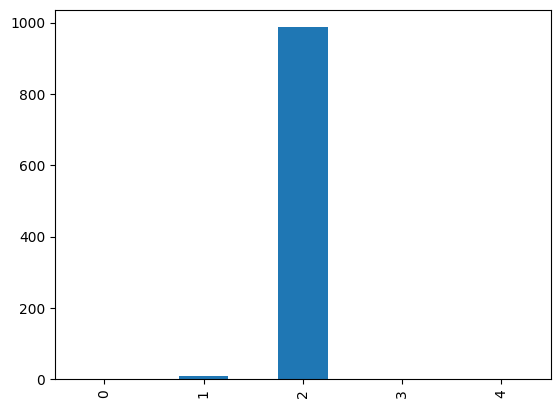

In [7]:
import numpy as np

labs, size = np.unique(kmeans_pred, return_counts=True)

list(zip(labs, size))

pop_lab = labs[np.argmax(size)]

pd.DataFrame(list(zip(labs, size)))[1].plot.bar()

**Ответ:** Кластеризация вышла бесполезной -- почти все значения ушли в один кластер, кроме одного для каждого остального лейбла.

Возможная причина -- слишком много фичей с нулевыми значениями у всех объектов, из-за чего для кластеризатора эти объекты очень похожи. Соответственно, кластеризатор помещает все объекты в первую категорию, а в остальных оставляет только центры кластеров + м.б. небольшое число близких к ним объектов

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [172]:
mask = list(kmeans_pred != pop_lab)
ratings[mask]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.0,0.0,0.0,0.0,0.043529,0.0,0.0,0.0,0.093398,0.017621,...,0.0,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.0
who,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022665,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
they might be giants [tmbg],0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.021292,...,0.0,0.0,0.000000,0.000000,0.000000,0.006464,0.0,0.000000,0.0,0.0
dead kennedys,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.019709,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.014652,0.0,0.000000,0.0,0.0


Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

In [169]:
print(f'Исполнители по средней доле прослушивания:\n{ratings.mean(axis=1).sort_values(ascending=False)}')
print(f'\nТОП20 по средней доле прослушивания:\n{ratings.mean(axis=1).sort_values(ascending=False).head(20)}')
print(f'\nСреднее средних долей прослушивания по всем исполнителям: {ratings.mean(axis=1).mean()}\n')

print('Исполнители по числу слушателей:')
(ratings != 0).sum(axis=1).sort_values(ascending=False)

Исполнители по средней доле прослушивания:
the beatles                          0.018369
radiohead                            0.011851
deathcab for cutie                   0.006543
niИ                                  0.006470
coldplay                             0.006030
                                       ...   
plus-44                              0.000215
finger eleven                        0.000212
jenny lewis with the watson twins    0.000211
jet                                  0.000199
the quitters                         0.000180
Length: 1000, dtype: float64

ТОП20 по средней доле прослушивания:
the beatles              0.018369
radiohead                0.011851
deathcab for cutie       0.006543
niИ                      0.006470
coldplay                 0.006030
modest mouse             0.005876
sufjan stevens           0.004969
dylan. bob               0.004963
pink fluid               0.004909
elliotte smith           0.004842
kanye west               0.004641
daft punk 

the beatles           1671
radiohead             1389
deathcab for cutie     931
coldplay               841
modest mouse           814
                      ... 
curtis mayfield         47
townes van zandt        47
municipal waste         47
refused                 47
yellowcard              47
Length: 1000, dtype: int64

**Ответ:** The Beatles по средней доле прослушивания сильно опережают остальные группы. Соответственно, в пространстве признаков эта группа слишком удалена от остальных, чтобы попасть в совместный с другими группами кластер. Остаётся вопросом, почему, например, Radiohead с похожей долей прослушивания не всегда попадает в отдельный кластер.

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [11]:
from sklearn.preprocessing import normalize

ratings_norm = normalize(ratings)

ratings_norm = pd.DataFrame(ratings_norm, index=ratings.index)

Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [14]:
import matplotlib.pyplot as plt

clstr = KMeans(n_clusters=5)

clstr.fit(ratings_norm)

pred = clstr.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    120
1     84
2    272
3    190
4    334
Name: 1, dtype: int64


<Axes: >

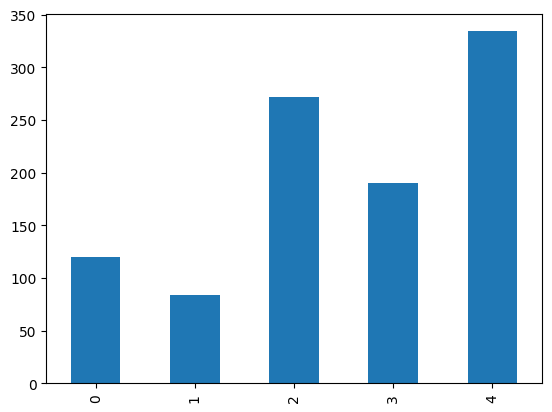

In [15]:

labs, size = np.unique(pred, return_counts=True)

pop_lab = labs[np.argmax(size)]

print(pd.DataFrame(list(zip(labs, size)))[1])

pd.DataFrame(list(zip(labs, size)))[1].plot.bar()

**Ответ** # Кластеризация получилась более сбалансированной. Можно попробовать поинтерпретировать

In [234]:
for label in range(5):
  mask = pred == label
  print(f'Средняя доля прослушиваний в категории {label}: {ratings[mask].mean(axis=1).mean():0.5f}')
  # категория 1 отличается от остальных по средней доле прослушиваний внутри кластера
  # вероятно, остальные кластеры разделены по менее тривиальному признаку

Средняя доля прослушиваний в категории 0: 0.00094
Средняя доля прослушиваний в категории 1: 0.00122
Средняя доля прослушиваний в категории 2: 0.00091
Средняя доля прослушиваний в категории 3: 0.00096
Средняя доля прослушиваний в категории 4: 0.00096


## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [16]:
from scipy.spatial.distance import cosine



centroids = clstr.cluster_centers_

top_cosines = pd.DataFrame([])

for cluster in range(5):
  mask = pred == cluster
  cosine_dist = pd.DataFrame([], index=ratings_norm[mask].index)
  cos_dist = []
  for _, artist in ratings_norm[mask].iterrows():
    cos_dist.append(cosine(centroids[cluster], artist))
  cosine_dist['cos_dist'] = cos_dist
  top = cosine_dist.sort_values(by='cos_dist', ascending=False)[0:20].index
  top_cosines['cluster ' + str(cluster)] = top



In [282]:
top_cosines

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
0,bone: thugs~n~harmony,passion pit,manchester orchestra,the pillows,pepper
1,r. kelly,"reatard, jay",travis,slightly stoopid,보아
2,chamillionaire,frightened rabbit,tim rice && andrew lloyd webb,tatu,refused
3,janet jackson.,stars of the lid,sondre lerche,pendulum,le tigre
4,flo rida,low,zimmer,mötley crüe,nujabes
5,cunninlynguists,the libertines,conor oberst,jonathan coulton,mstrkrft
6,jedi mind tricks,wire,owl city,日dir en grey,dido
7,akon,echo and the bunnymen,kevin devine,def leppard,various korean artists
8,immortal technique,eno,josh groban,creed,sage francis
9,destinys child,antony; johnsons,the sounds,sunny day real estate,clutch


**Ответ:** # Можно сделать несмелое предположение, что кластеры примерно соответствуют разбиению исполнителей на жанры: в нулевом кластере хип-хоп/рэп/арэнби, в первом -- инди-рок/эмбиент/постпанк, во втором -- классика, современная академическая музыка, саундтреки к мультфильмам и фильмам, в третьем -- метал?, в четвёртом -- танцевальная музыка

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

In [339]:
# посмотрим, какие признаки наиболее заполненные, чтобы было интереснее строить

import itertools

top_features = (ratings_norm != 0).sum(axis=0).sort_values(ascending=False)[0:5]

mask = ratings_norm.columns.isin(top_features.index)

selected_features = ratings_norm.loc[:, mask]

selected_features['cluster'] = pred



<ipython-input-339-b7c6ed48e59d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['cluster'] = pred


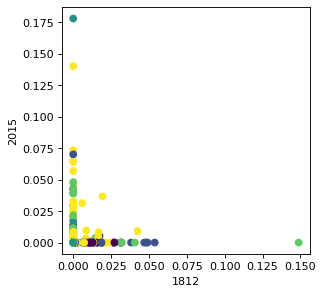

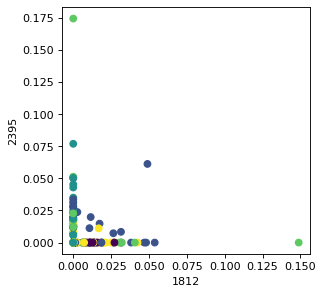

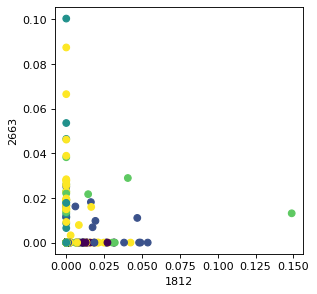

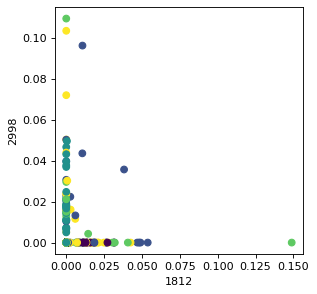

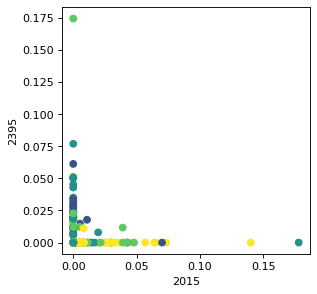

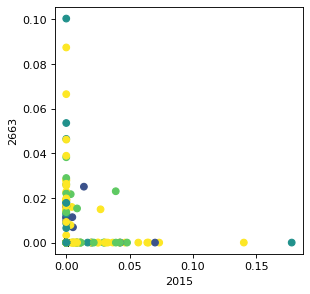

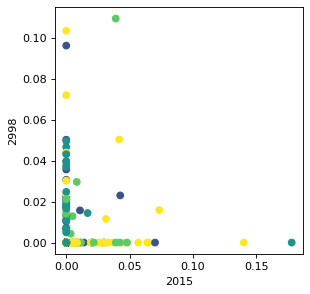

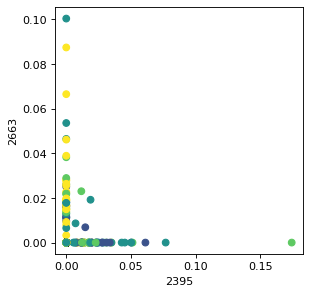

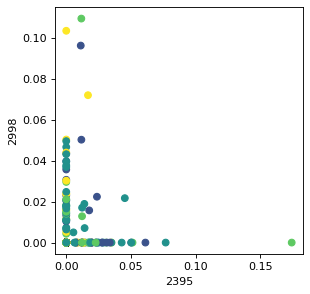

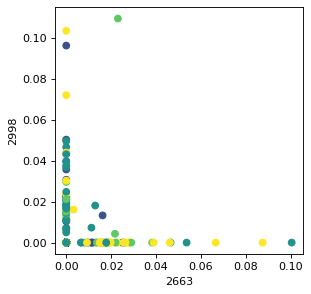

In [340]:
import matplotlib.pyplot as plt



for x, y in list(itertools.combinations(selected_features.columns[:5], 2)):
  plt.figure(figsize=(4, 4), dpi=80)
  plt.scatter(x=selected_features[x], y=selected_features[y], c=selected_features['cluster'])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

**Ответ:** Визуализации никак не отражают разделение на кластеры (хотя мы и попытались взять наиболее содержательные признаки на наш взгляд), поскольку кластеризация производилась в многомерном (5000-мерном) пространстве признаков, а визуализацию мы строим по некоторым случайным двум признакам из этого пространства.

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

In [17]:
from sklearn.manifold import TSNE

ratings_emb = pd.DataFrame(TSNE(n_components=2, ).fit_transform(ratings_norm))
ratings_emb['cluster'] = pred

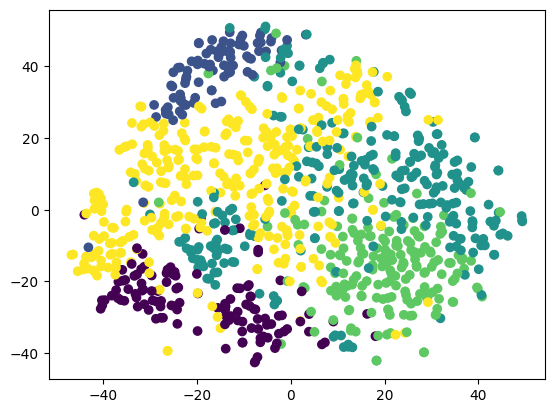

НУ КРАСОТА ЖЕ!!!


In [18]:
plt.scatter(x=ratings_emb[0], y=ratings_emb[1], c=ratings_emb['cluster'])

plt.show()

print('НУ КРАСОТА ЖЕ!!!')

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [19]:
from sklearn.metrics import silhouette_score

best_ss = 0
best_n = 0

for n in range(2, 90):
  print(f'checking {n} of {90}')
  km = KMeans(n_clusters=n)
  km.fit(ratings_norm)
  pred = km.labels_
  ss = silhouette_score(ratings_norm, pred)
  if ss > best_ss:
    best_ss = ss
    best_n = n

print(f'Лучший sil_sc: {best_ss} при числе кластеров {best_n}')


checking 2 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 3 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 4 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 5 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 6 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 7 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 8 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 9 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 10 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 11 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 12 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 13 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 14 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 15 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 16 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 17 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 18 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 19 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 20 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 21 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 22 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 23 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 25 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 26 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 27 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 28 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 29 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 30 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 31 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 32 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 33 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 34 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 35 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 36 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 37 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 38 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 39 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 40 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 41 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 42 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 43 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 44 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 45 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 46 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 47 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 48 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 49 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 50 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 51 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 52 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 53 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 54 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 55 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 56 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 57 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 58 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 59 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 60 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 61 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 62 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 63 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 64 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 65 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 66 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 67 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 68 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 69 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 70 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 71 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 72 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 73 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 74 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 75 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 76 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 77 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 78 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 79 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 80 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 81 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 82 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 83 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 84 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 85 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 86 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 87 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 88 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


checking 89 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Лучший sil_sc: 0.013388541507802838 при числе кластеров 84


Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [29]:
clstr = KMeans(n_clusters=84)

clstr.fit(ratings_norm)

pred = clstr.labels_

centroids = clstr.cluster_centers_

top_cosines = pd.DataFrame([])

for cluster in range(84):
  mask = pred == cluster
  cosine_dist = pd.DataFrame([], index=ratings_norm[mask].index)
  cos_dist = []
  for _, artist in ratings_norm[mask].iterrows():
    cos_dist.append(cosine(centroids[cluster], artist))
  cosine_dist['cos_dist'] = cos_dist
  top = list(cosine_dist.sort_values(by='cos_dist', ascending=False).index)
  top = top + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  # print(top)
  top_cosines['cluster ' + str(cluster)] = top[0:10]

top_cosines

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,...,cluster 74,cluster 75,cluster 76,cluster 77,cluster 78,cluster 79,cluster 80,cluster 81,cluster 82,cluster 83
0,"reinhardt, django",hoobastank,maroon5,metric,nickel creek,owen,nowa jones,植松伸夫,the used,nujabes,...,placebo,the streets,311,tool,ween,corinne bailey rae,casiotone for the painfully alone,ceremony,los campesinos!,david gray
1,tim rice && andrew lloyd webb,secondhand serenade,plus-44,rooney,busta rhymes,why?,crustina aguilera,the cardigans,scary kids scaring kids,cunninlynguists,...,death from above 1979,matt pond pa,the hives,lamb of god,nick cave and the bad seeds,chris tomlin,thhe raveonettes,dead kennedys,kings of leon,cocteau twins
2,lily allen,rent: original broadway cast,yellowcard,guster,veronicas,cocorosie,sade,dead can dance,bring me the horizon,deltron 3030,...,the cramps,the clientele,the pogues,agalloch,the fall,newsboys,pj harvey,minor threat,manchester orchestra,various korean artists
3,mitch hedberg,senses fail*,panic! at the disco -,yeah yeah yeahs,timbaland,final fantasy6,マイケル・ジャクソン,群星,from first to last,jurassic 5,...,clutch,the breeders,anti-flag,in flames,the replacements,michal w. smith,the blow,bad brains,cold war kids,phantom planet
4,elvis costello and the attractions,evril lavigne,mae,bishop allen,michelle branch,ratatat,laurуn hill,eisley,killswitch engage,de la soul,...,the melvins,destroyer,social distortion,cob,wire,0,blonde redhead,black flag,0,"rice, demien"
5,weird al yankovic,bowling for soup,the rocket summer,doves,daughtry,the sea and cake,missy elliott,scissor sisters;,|avenged sevenfold,blackalicious,...,queens off the stone age,morrissey,the misfits,dimmu borgir,butthole surfers,0,les savy fav,0,0,rachael yamagata
6,abba,new found glory,jack’s mannequin,the apples in stereo,leona lewis,crystal castles,usher,tori amos,all that remains,people under the staris,...,eagles of death metal,aimee mann,me first and the gimme gimmes,opeth,minutemen,0,sleater-kinney,0,0,james blunt
7,stevens. cat,sum41,armor for sleep,mates of state,the fray,devendra banhart,mariah carey,frou frou,atreyu,0,...,0,m.i.a.*,the ramones,amon amarth,gang of four,0,dinosaur jr.,0,0,0
8,the beach boys,good charlotte,plain white t＇s,josй gonzalez,kelly clarkson,the american analog set,alicia keys,garbage,bullet for my valintine,0,...,0,fiest,the clash,0,sonic youth,0,sebadoh,0,0,0
9,tom petty and the heartbreakers,0,acceptance,"peter,bjorn & john",timbaland presents onerepublic,the dodos,mary j. blige,the knife,as i lay dying,0,...,0,antony; johnsons,flogging molly,0,hüsker dü,0,0,0,0,0


**Ответ:** # Местами получили более узкие классные жанры (например, кластер 81 -- хардкор-панк, 78 -- экспериментальный авангардный рок)


Сделайте t-SNE визуализацию полученной кластеризации.

In [34]:
ratings_emb = pd.DataFrame(TSNE(n_components=2, ).fit_transform(ratings_norm))
ratings_emb['cluster'] = pred

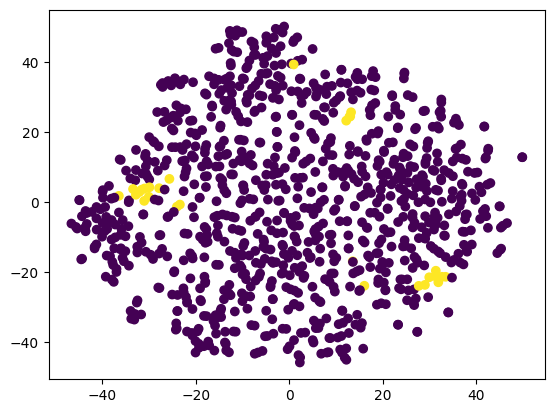

In [43]:
plt.scatter(x=ratings_emb[0], y=ratings_emb[1], c=(ratings_emb['cluster'].isin([78, 81, 6])))

plt.show()

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

**Ответ:** # Кластеры явно локализованы, выглядит интересно. У нас получилось своеобразное музыкальное пространство, в котором мы можем выделять отдельные небольшие жанры